In [3]:
""" Imports """
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks, argrelextrema

# Manual Work - no automation

In [4]:
""" Pull Data Manually """
ch1data = pd.read_csv("../LtoutputFiles/output289ch1_05_08_2023.txt", sep="\t")
ch4data = pd.read_csv("../LtoutputFiles/output289ch4_05_08_2023.txt", sep="\t")

In [5]:
"""
Formatting 
- Name Columns 
- Create Data frame
    - Quick plot: <dataframe>.plot()
- Truncate: not needed (?)
- Array assignment 
"""

# Name columns 
ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

# Create data frame 
ch1 = pd.DataFrame(ch1data)
ch4 = pd.DataFrame(ch4data)

# Naming and floats
ch1t = ch1["Time"].to_numpy()
ch4t = ch4["Time"].to_numpy()
ch1V = ch1["V(compout)-CH1"].to_numpy()
ch4V = ch4["V(compout)-CH4"].to_numpy()

<Axes: >

<Figure size 640x480 with 0 Axes>

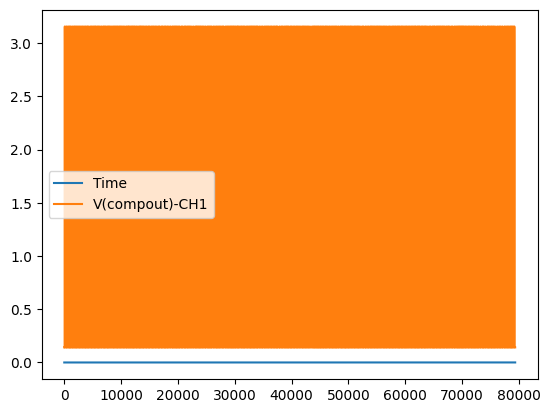

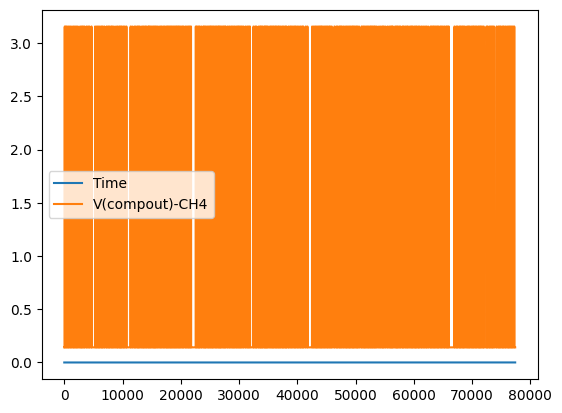

In [6]:
""" View Full Data """
plt.figure(1)
ch1.plot()
plt.figure(2)
ch4.plot()

In [7]:
""" 
Find Rising edge (Full dataset): Testing block
    - Variable Threshold voltage: 1.6V 
"""
# set
threshold = 1.5 # volts

# use scipy
peakindexCH1, _ = find_peaks(ch1V, height=threshold, distance =25)
peakindexCH4, _ = find_peaks(ch4V, height=threshold, distance =25)
peaksV_CH1 = ch1V[peakindexCH1]
peaksV_CH4 = ch4V[peakindexCH4]

print(f'Total # of Peak indices\nch1: {len(peakindexCH1)}\nch4: {len(peakindexCH4)}')

Total # of Peak indices
ch1: 302
ch4: 290


Window details:
# of indices CH1: 50
# of indices CH4: 50
Time interval CH1: 5.88e-11
Time internal Ch4: 2.54e-10

Both Channels


<Figure size 640x480 with 0 Axes>

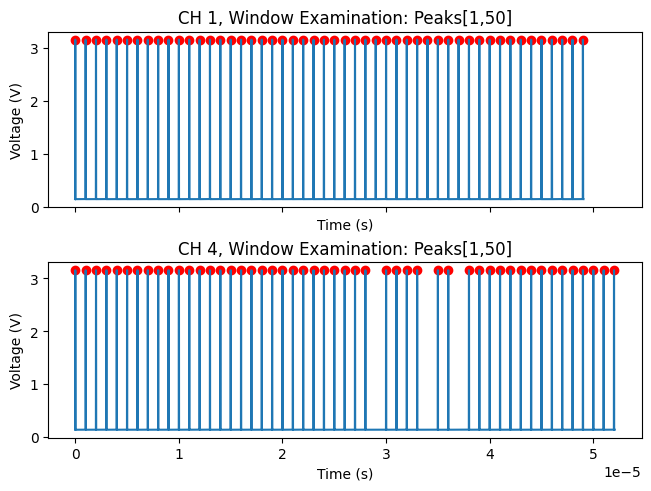

In [8]:
"""
Examine any Window of Data 
- peaks will serve as reference points
- Select left/right peaks 
- Select Channel 
"""

# Set window: [1st peak : 29th peak] & select window 
left_peak = 1
right_peak = 50

# To see both set Ch_select = 0
Ch_select = 0


# Window
ch1_wind = ch1.truncate(before=peakindexCH1[left_peak-1]-25 , after=peakindexCH1[right_peak-1]+50)
ch4_wind = ch4.truncate(before=peakindexCH4[left_peak-1]-25 , after=peakindexCH4[right_peak-1]+50)

# # print(f"len ch1: {len(ch1)}\nlen ch4: {len(ch4)}")
# if len(ch1_wind) < len(ch4_wind): 
#     ch1_wind = ch1_wind.truncate(after=len(ch1_wind)-1) # smallest less 1 bc `after` adds a value
#     ch4_wind = ch4_wind.truncate(after=len(ch1_wind)-1)
# else: 
#     ch1_wind = ch1_wind.truncate(after=len(ch4_wind)-1)
#     ch4_wind = ch4_wind.truncate(after=len(ch4_wind)-1)
# # print(f"\nTruncation:\nlen ch1: {len(ch1)}\nlen ch4: {len(ch4)}")


# Extract arrays 
ch1t_wind = ch1_wind["Time"].to_numpy()
ch4t_wind = ch4_wind["Time"].to_numpy()
ch1V_wind = ch1_wind["V(compout)-CH1"].to_numpy()
ch4V_wind = ch4_wind["V(compout)-CH4"].to_numpy()

dtCH1 = ch1t[right_peak] - ch1t[left_peak]
dtCH4 = ch4t[right_peak] - ch4t[left_peak]

# Prints
text =f'Window details:\n# of indices CH1: {len(peakindexCH1[left_peak:right_peak+1])}'
text += f'\n# of indices CH4: {len(peakindexCH4[left_peak:right_peak+1])}'
text += f'\nTime interval CH1: {dtCH1:2.2e}'
text += f'\nTime internal Ch4: {dtCH4:2.2e}'
print(text)

if Ch_select == 1: 
    print(f"Channel {Ch_select}: ")
    plt.figure(1, figsize = (6,4))
    plt.plot(ch1t_wind,ch1V_wind, label="CH1-Data")
    plt.scatter(ch1t[peakindexCH1[left_peak-1:right_peak]],
                ch1V[peakindexCH1[left_peak-1:right_peak]],  
                marker='o', 
                color='red', 
                label="Peak")

    plt.title(f"CH {Ch_select}, Window Examination: Peaks[{left_peak},{right_peak}]")
    plt.xlabel("Time")
    plt.ylabel("Voltage (V)")
    # plt.axvline(x = 6e-9, color = 'b', label = 'axvline - full height')
    plt.axhline(y = 1.5, color = 'r', linestyle = '-', label='Mid value')
    plt.legend(bbox_to_anchor=(1,1))

elif Ch_select == 4:
    print(f"Channel {Ch_select}: ")

    plt.figure(2, figsize = (6,4))
    plt.plot(ch4t_wind,ch4V_wind, label="CH4-Data")
    plt.scatter(ch4t[peakindexCH4[left_peak-1:right_peak]],
                ch4V[peakindexCH4[left_peak-1:right_peak]],  
                marker='o', 
                color='red', 
                label="Peak")

    plt.title(f"CH {Ch_select}, Window Examination: Peaks[{left_peak},{right_peak}] ")
    plt.xlabel("Time")
    plt.ylabel("Voltage (V)")
    # plt.axvline(x = 6e-9, color = 'b', label = 'axvline - full height')
    plt.axhline(y = 1.5, color = 'r', linestyle = '-', label='Mid value')
    plt.legend(bbox_to_anchor=(1,1))

elif Ch_select == 0: 
    print('\nBoth Channels')
    plt.figure(3)
    fig, ax = plt.subplots(2,1, sharex=True, constrained_layout=True)

    ax[0].plot(ch1t_wind,ch1V_wind, label="CH1-Data")
    ax[0].scatter(ch1t[peakindexCH1[left_peak-1:right_peak]],
                ch1V[peakindexCH1[left_peak-1:right_peak]],  
                marker='o', 
                color='red', 
                label="Peak")
    
    ax[0].set_title(f"CH 1, Window Examination: Peaks[{left_peak},{right_peak}]")
    ax[0].set_ylabel('Voltage (V)')
    ax[0].set_xlabel('Time (s)')

    ax[1].plot(ch4t_wind,ch4V_wind, label="CH4-Data")
    ax[1].scatter(ch4t[peakindexCH4[left_peak-1:right_peak]],
                ch4V[peakindexCH4[left_peak-1:right_peak]],  
                marker='o', 
                color='red', 
                label="Peak")
    ax[1].set_title(f"CH 4, Window Examination: Peaks[{left_peak},{right_peak}]")
    ax[1].set_ylabel('Voltage (V)')
    ax[1].set_xlabel('Time (s)')


In [9]:
""" Print Checks """
# text = f"Number of peaks CH1: {len(peakindexCH1[left_peak-1:right_peak])}"
# print(text)
# text  = f"# of Total points in Ch1: {len(ch1t)}"
# text += f"\n# of Total points in Ch4: {len(ch4t)}"
# text += f"\n# of Total points found after Boolean truncation in Ch1: {len(tdiff_CH1)}"
# text += f"\n# of Total points found after Boolean truncation in Ch1: {len(tdiff_CH4)}"
# print(text)

# text =  f"\nLength of conition_1: {len(condition_1_CH1)}"
# text += f"\nLength of conition_2: {len(condition_2_CH1)}"
# text +=  f"\n\nLength of conition_1: {len(condition_1_CH4)}"
# text += f"\nLength of conition_2: {len(condition_2_CH4)}"
# print(text)

# if condition_1_CH1[0]:
#     print(condition_1_CH1[0])
# print(condition_1_CH1[1:1])

# print('Number of expected peaks:', num)


# print("We expect to remove", len(tdiff_CH4[tdiff_CH4>1e-6]))

# if False skip = if slope isn't desired skip else do block
# [],[1,1],[2,2],...
# [0,1],[1,2],...
# if [] is an option coninue 

# r = np.array(removed)
# for i in removed: 
#     print(f'{i:.2e}')

' Print Checks '

In [10]:
def plot_test_data(ch_select, x, y):
    # check peaks and return # of peaks 
    peakindex, _ = find_peaks(y, height =1.5, distance = 25 )
    
    plt.figure(1, figsize = (6,4))
    plt.scatter(x,y, label=f"CH{ch_select}-Data")
    plt.title(f"Truncated Data with {len(peakindex)} peaks")
    plt.xlabel("Time")
    plt.ylabel("Voltage (V)")
    # plt.axvline(x = 6e-9, color = 'b', label = 'axvline - full height')
    plt.axhline(y = 1.5, color = 'r', linestyle = '-', label='Mid value')
    plt.legend(bbox_to_anchor=(1,1))


# plot_test_data(1,ch1t,ch1V)

In [12]:
"""
Attempt 3 Fully isolated block not a Function block
- Test on CH4 
- This works : KEEP THIS WITHOUT EDITS 
"""
# Pull data 
ch1data = pd.read_csv("../LtoutputFiles/output289ch1_05_08_2023.txt", sep="\t")
ch4data = pd.read_csv("../LtoutputFiles/output289ch4_05_08_2023.txt", sep="\t")
# Name columns 
ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

# Create data frame 
ch1 = pd.DataFrame(ch1data)
ch4 = pd.DataFrame(ch4data)

# Naming and floats
ch1t = ch1["Time"].to_numpy()
ch4t = ch4["Time"].to_numpy()
ch1V = ch1["V(compout)-CH1"].to_numpy()
ch4V = ch4["V(compout)-CH4"].to_numpy()

# Determine number of expected pulses --------------------------------------------- 

# set
threshold = 1.5 # volts

# use scipy
peakindexCH1, _ = find_peaks(ch1V, height=threshold, distance =25)
peakindexCH4, _ = find_peaks(ch4V, height=threshold, distance =25)
peaksV_CH1 = ch1V[peakindexCH1]
peaksV_CH4 = ch4V[peakindexCH4]

print(f'Total # of Peak indices\nch1: {len(peakindexCH1)}\nch4: {len(peakindexCH4)}')

# Declare values and counters ------------------------------------------------------
num = len(peakindexCH4)

Ch_select = 4
thresh = 1.6
grad = np.gradient(ch4V)
limit = grad >= 0.1                     # Boolean array

rtime = ch4t[limit]                     # truncated data 
rV = ch4V[limit]

tdiff = np.diff(rtime)                  # Note this is one index smaller than array
lower_lim_1 = 1e-7                      # time to next desired point 
lower_lim_2 = 1e-6                      # time over a large enough gap
condition_1 = tdiff > lower_lim_1       # Boolean check
condition_2 = tdiff > lower_lim_2       

# Prints 
text = f"\nWe expect to find {num} pulses: ch1 > ch4 we take the smaller"
text += f'\nCondition_1 is hit {len(tdiff[tdiff> lower_lim_1])} times.'
text += f'\nCondition_2 is hit {len(tdiff[tdiff> lower_lim_2])} times.'
text += f'\n\nWe expect to remove {len(tdiff[tdiff>lower_lim_2])} points from CH{Ch_select}'
text += f'\n{len(tdiff[tdiff> lower_lim_1])} - {len(tdiff[tdiff>lower_lim_2])} = {len(tdiff[tdiff> lower_lim_1])-len(tdiff[tdiff>lower_lim_2])}\n'
print(text)


# Counts 
count_runs = 0
start_inx = 0
removed_count = 0 
pulses = 0 
out = np.zeros(num)

removed = []
out_list = []

for i in range(len(tdiff)): 


    if condition_1[i]: # if true > 1e-7
        dt = rtime[start_inx : i]
        dv = rV[start_inx : i]

        start_inx = i + 1
                         
        if len(dt) < 1 or len(dv) < 1:              
            continue
        m, b = np.polyfit(dt,dv, deg =1)
        out[pulses] = (thresh -b) / m
        t = (thresh -b) / m
        out_list.append(t)

        count_runs += 1
        pulses += 1
    if condition_2[i]: 
        count_runs += 1
        removed_count +=1 
        removed.append(rtime[i])
        print(f'{removed_count}.\tRemoved {rtime[i]:.2e} s' )

print(f"\nLength of output list: {len(out_list)}")
print(f'Total Run Count: {count_runs}')
print(f'Removed: {removed_count}')
print(f'Pulses: {pulses}')


Total # of Peak indices
ch1: 302
ch4: 290

We expect to find 290 pulses: ch1 > ch4 we take the smaller
Condition_1 is hit 289 times.
Condition_2 is hit 12 times.

We expect to remove 12 points from CH4
289 - 12 = 277

1.	Removed 2.80e-05 s
2.	Removed 3.30e-05 s
3.	Removed 3.50e-05 s
4.	Removed 3.60e-05 s
5.	Removed 5.90e-05 s
6.	Removed 1.15e-04 s
7.	Removed 1.33e-04 s
8.	Removed 1.47e-04 s
9.	Removed 1.57e-04 s
10.	Removed 2.48e-04 s
11.	Removed 2.82e-04 s
12.	Removed 2.86e-04 s

Length of output list: 289
Total Run Count: 301
Removed: 12
Pulses: 289


In [21]:
""" Attempt post post processing """
# Pull data 
ch1data = pd.read_csv("../LtoutputFiles/output289ch1_05_08_2023.txt", sep="\t")
ch4data = pd.read_csv("../LtoutputFiles/output289ch4_05_08_2023.txt", sep="\t")
# Name columns 
ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

# Create data frame 
ch1 = pd.DataFrame(ch1data)
ch4 = pd.DataFrame(ch4data)

# Naming and floats
ch1t = ch1["Time"].to_numpy()
ch4t = ch4["Time"].to_numpy()
ch1V = ch1["V(compout)-CH1"].to_numpy()
ch4V = ch4["V(compout)-CH4"].to_numpy()



print(f'Total # of Peak indices\nch1: {len(peakindexCH1)}\nch4: {len(peakindexCH4)}')

def time_at_thresh(t, v, Ch_select, num, thresh=1.5):
    print(f'\n------------Channel {Ch_select} Information -----------------')
    # use scipy
    peakindex, _ = find_peaks(v, height=thresh, distance =25)
    num = len(peakindex)


    out = np.zeros(num)
    grad = np.gradient(v)           # find gradients on all data
    limit =  (grad >= 0.1)              # positive slope bigger than 0.1
    rtime = t[limit]
    rV = v[limit]
    tdiff = np.diff(rtime)  
    
    lower_lim_1 = 1e-7                      # check if next point is 100ns away 
    lower_lim_2 = 1e-6                      # check if missing points with 1500ns gap
    condition_1 = tdiff > lower_lim_1       # Boolean check
    condition_2 = tdiff > lower_lim_2       

    # Prints 
    text = f'\nCondition_1 is hit {len(tdiff[tdiff> lower_lim_1])} times.'
    text += f'\nCondition_2 is hit {len(tdiff[tdiff> lower_lim_2])} times.'
    text += f'\n\nWe expect to remove {len(tdiff[tdiff>lower_lim_2])} points from CH{Ch_select}'
    text += f'\n{len(tdiff[tdiff> lower_lim_1])} - {len(tdiff[tdiff>lower_lim_2])} = {len(tdiff[tdiff> lower_lim_1])-len(tdiff[tdiff>lower_lim_2])}\n'
    print(text)
    
    count = 0
    start_index = 0
    removed_count = 0 
    pulses = 0 
    out = np.zeros(num)
    removed = []
    out_list =[]
    
    for i in range(len(tdiff)):                     # for number of particles we expect
        if condition_1[i] and count != num:                            # if condition is true at index i
            
            dt = rtime[start_index:i]               # take snippet of time from starting index flag to index i
            dv = rV[start_index:i]
            start_index = i + 1                       # reset flag to next position

            if len(dt) < 1 or len(dv) < 1:          # if no particle here then skip
                continue
            m, b = np.polyfit(dt,dv, deg=1)         # find linear fit

            # if deg=1 returns two params slope m and y-intercept b
            # now use slope and intercept to solve for x value given our mid value y
            # y = mt + b  --> t = (y - b) / m
            t = (thresh - b) / m
            out_list.append(t)
            out[count] = (thresh - b) / m
            count +=1                               # count particle!
            pulses += 1

        if condition_2[i]:
            count +=1
            removed_count +=1 
            removed.append(rtime[i])
            print(f'{removed_count}.\tRemoved {rtime[i]:.2e} s' )

    print(f"\nLength of output list: {len(out_list)}")
    print(f'Total Run Count: {count_runs}')
    print(f'Removed: {removed_count}')
    print(f'Pulses: {pulses}')    

    return np.array(out)

def TOF_finalize(tofch1, tofch4, num):
    limit = 10e-9

    too_large =[]
    out = []
    for i in range(num):
        if (tofch1[i] == 0) or (tofch4[i] == 0):
            continue
        if abs(tofch1[i] - tofch4[i]) > limit: 
            too_large.append(abs(tofch1[i] - tofch4[i]))
        elif abs(tofch1[i] - tofch4[i]) <= limit:
            out.append(abs(tofch1[i] - tofch4[i]))


    print("ch1 length", len(tofch1), "largest time diff", "%.5e" % max(np.diff(tofch1)), "zeros", (tofch1 == 0.0).sum())
    print("ch4 length", len(tofch4), "largest time diff", "%.5e" % max(np.diff(tofch4)), "zeros", (tofch4 == 0.0).sum())
    text = f"\nFinished calculating, {len(out)} particles"
    text += f"\nRemoved {len(too_large)} counts; their difference is larger than {limit:1e} "
    print(text)
    return np.array(out)

num = 301
ch1Tof = time_at_thresh(ch1t,ch1V,num, 1)
ch4Tof = time_at_thresh(ch4t,ch4V, num, 4)
FinalToF = TOF_finalize(ch1Tof,ch4Tof, 289)
# print(FinalToF)


Total # of Peak indices
ch1: 302
ch4: 290

------------Channel 301 Information -----------------

Condition_1 is hit 301 times.
Condition_2 is hit 0 times.

We expect to remove 0 points from CH301
301 - 0 = 301


Length of output list: 301
Total Run Count: 301
Removed: 0
Pulses: 301

------------Channel 301 Information -----------------

Condition_1 is hit 289 times.
Condition_2 is hit 12 times.

We expect to remove 12 points from CH301
289 - 12 = 277

1.	Removed 2.80e-05 s
2.	Removed 3.30e-05 s
3.	Removed 3.50e-05 s
4.	Removed 3.60e-05 s
5.	Removed 5.90e-05 s
6.	Removed 1.15e-04 s
7.	Removed 1.33e-04 s
8.	Removed 1.47e-04 s
9.	Removed 1.57e-04 s
10.	Removed 2.48e-04 s
11.	Removed 2.82e-04 s
12.	Removed 2.86e-04 s

Length of output list: 278
Total Run Count: 301
Removed: 12
Pulses: 278
ch1 length 302 largest time diff 1.00129e-06 zeros 1
ch4 length 290 largest time diff 2.89006e-04 zeros 12

Finished calculating, 34 particles
Removed 243 counts; their difference is larger than 1.000000